<a href="https://colab.research.google.com/github/Kdarby89/Python-Projects/blob/main/Book_records_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162727 sha256=ab10d405b4e12faca2b071d7fc03c186c8e58429e074f31a31f3cb00ce8c7c3f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from surprise.model_selection import train_test_split, KFold
from surprise.prediction_algorithms.matrix_factorization import SVD

from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')

In [ ]:
book=pd.read_csv('/content/Books.csv.crdownload')
rating=pd.read_csv('/content/Ratings.csv')
user=pd.read_csv('/content/Users.csv.crdownload')

In [ ]:
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
# shows us the count for each entry in the book-rating column( 0 has been entered 716109 times)
rating['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [ ]:
# shows us the how many ratings a user has submitted(user 11676 has submitted 13602 ratings)
rating['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

In [ ]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
7936,1558216847,The Long Walk: The True Story of a Trek to Fre...,Slavomir Rawicz,1997,The Lyons Press,http://images.amazon.com/images/P/1558216847.0...,http://images.amazon.com/images/P/1558216847.0...,http://images.amazon.com/images/P/1558216847.0...
7937,0590313185,Bunnicula: A Rabbit-Tale of Mystery,Deborah and James Howe,1997,Scholastic Inc.School Market Edition,http://images.amazon.com/images/P/0590313185.0...,http://images.amazon.com/images/P/0590313185.0...,http://images.amazon.com/images/P/0590313185.0...
7938,0590462253,The Littles (Littles),John Peterson,1993,Little Apple,http://images.amazon.com/images/P/0590462253.0...,http://images.amazon.com/images/P/0590462253.0...,http://images.amazon.com/images/P/0590462253.0...
7939,0671024094,The Coffin Dancer (Lincoln Rhyme Novels (Paper...,Jeffery Deaver,1999,Pocket Books,http://images.amazon.com/images/P/0671024094.0...,http://images.amazon.com/images/P/0671024094.0...,http://images.amazon.com/images/P/0671024094.0...


In [ ]:
df = pd.merge(rating,book.drop_duplicates(['ISBN']), on='ISBN', how='left')

In [ ]:
df.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1, inplace=True)

In [ ]:
df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,NaN,NaN,NaN,NaN
2,276727,0446520802,0,NaN,NaN,NaN,NaN
3,276729,052165615X,3,NaN,NaN,NaN,NaN
4,276729,0521795028,6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,NaN,NaN,NaN,NaN
1149776,276706,0679447156,0,NaN,NaN,NaN,NaN
1149777,276709,0515107662,10,NaN,NaN,NaN,NaN
1149778,276721,0590442449,10,NaN,NaN,NaN,NaN


In [ ]:
df.rename(columns= {'User-ID': 'user_id',
                  'ISBN': 'isbn',
                  'Book-Rating' :'rating'},
                  inplace=True)

In [ ]:
df

,user_id,isbn,rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,NaN,NaN,NaN,NaN
2,276727,0446520802,0,NaN,NaN,NaN,NaN
3,276729,052165615X,3,NaN,NaN,NaN,NaN
4,276729,0521795028,6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,NaN,NaN,NaN,NaN
1149776,276706,0679447156,0,NaN,NaN,NaN,NaN
1149777,276709,0515107662,10,NaN,NaN,NaN,NaN
1149778,276721,0590442449,10,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_id              1149780 non-null  int64  
 1   isbn                 1149780 non-null  object 
 2   Book-Rating          1149780 non-null  int64  
 3   Book-Title           236152 non-null   object 
 4   Book-Author          236152 non-null   object 
 5   Year-Of-Publication  236152 non-null   float64
 6   Publisher            236152 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 70.2+ MB


In [ ]:
df['isbn']=df['isbn'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_id              1149780 non-null  int64  
 1   isbn                 1149780 non-null  object 
 2   Book-Rating          1149780 non-null  int64  
 3   Book-Title           236152 non-null   object 
 4   Book-Author          236152 non-null   object 
 5   Year-Of-Publication  236152 non-null   float64
 6   Publisher            236152 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 70.2+ MB


<Axes: xlabel='rating', ylabel='count'>

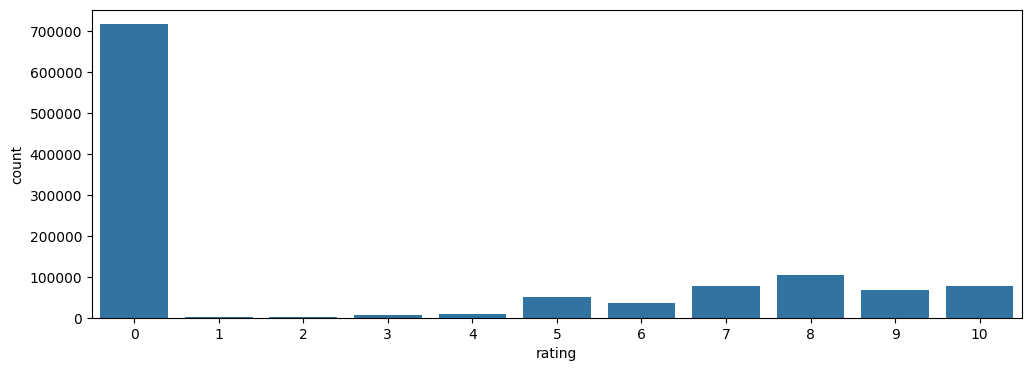

In [ ]:
plt.figure(figsize = (12,4))
sns.countplot(data=df, x ='rating')# where the data comes from, and what are we measuring

In [ ]:
df.drop(df.index[df['rating']==0], inplace=True) # from df drop the rows(index axis) that have a rating of 0

<Axes: xlabel='rating', ylabel='count'>

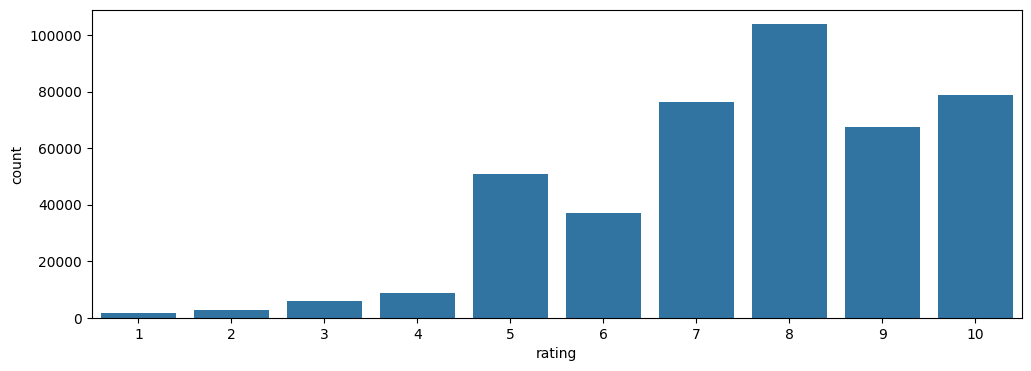

In [ ]:
plt.figure(figsize = (12,4))
sns.countplot(data=df, x='rating')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433671 entries, 1 to 1149779
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              433671 non-null  int64  
 1   isbn                 433671 non-null  object 
 2   rating               433671 non-null  int64  
 3   Book-Title           96740 non-null   object 
 4   Book-Author          96740 non-null   object 
 5   Year-Of-Publication  96740 non-null   float64
 6   Publisher            96740 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 26.5+ MB


In [ ]:
df.user_id.nunique()

77805

In [ ]:
df.isbn.nunique()

185973

In [ ]:
df.groupby(['user_id','isbn']).count()#this shows us what books each user reviewed. user 8 has reveiwed the books next to his user id

rating  Book-Title  Book-Author  Year-Of-Publication  \
user_id isbn                                                               
8       0002005018       1           1            1                    1   
        074322678X       1           1            1                    1   
        0887841740       1           1            1                    1   
        1552041778       1           1            1                    1   
        1567407781       1           1            1                    1   
...                    ...         ...          ...                  ...   
278854  0375703063       1           0            0                    0   
        042516098X       1           1            1                    1   
        0425163393       1           0            0                    0   
        0553275739       1           0            0                    0   
        0553579606       1           1            1                    1   

                    Publisher  
user_id isbn                   
8       0002005018          1  
        074322678X          1  
        0887841740          1  
        1552041778          1  
        1567407781          1  
...                       ...  
278854  0375703063          0  
        042516098X          1  
        0425163393          0  
        0553275739          0  
        0553579606          1  

[433671 rows x 5 columns]

In [ ]:
#this shows us the total ratings of all the users. Since it matches our info, it means a user has not reviewed the same book twice
df.groupby(['user_id', 'isbn']).count()['rating'].sum()

433671

In [ ]:
df.isbn.value_counts()#shows us the amount of ratings each book has received

0316666343     707
0971880107     581
0385504209     487
0312195516     383
0679781587     333
              ... 
0140441905       1
0886777267       1
0671697951       1
0553560956       1
05162443314      1
Name: isbn, Length: 185973, dtype: int64

<Axes: >

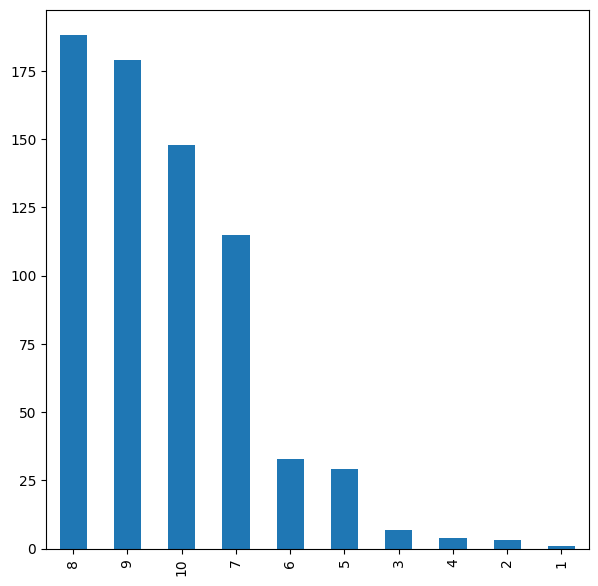

In [ ]:
plt.figure(figsize=(7,7))
df[df['isbn']== '0316666343']['rating'].value_counts().plot(kind='bar')
# shows the entries in the df -->'isbn' that have '0316666343' for just the ratings. value counts shows us how many of each rating the book received.
# .plot(kind='bar') turns it into a bar graph

In [ ]:
df.user_id.value_counts()#shows the amount of times a user rated a book

11676     8524
98391     5802
153662    1969
189835    1906
23902     1395
          ... 
114079       1
114081       1
114096       1
114115       1
276723       1
Name: user_id, Length: 77805, dtype: int64

In [ ]:
users = df.user_id#creates a seperate column of user id
users

1          276726
3          276729
4          276729
6          276736
7          276737
            ...  
1149773    276704
1149775    276704
1149777    276709
1149778    276721
1149779    276723
Name: user_id, Length: 433671, dtype: int64

In [ ]:
ratings_count = dict()
for user in users:
  if user in ratings_count:
    ratings_count[user] +=1

  else:
    ratings_count[user] =1
    #if a user is in the ratings_count list already: add 1 to his total ratings, if he is not or has 0 ratings: give him 1

In [ ]:
# A function that removes users with less than 50 ratings, and puts them in a seperate list
ratings_cutoff = 50
remove_users=[]

for user, num_ratings in ratings_count.items():
  if num_ratings < ratings_cutoff:
    remove_users.append(user)

In [ ]:
df=df.loc[-df.user_id.isin(remove_users)]
#this shows us the df without the users that are on the remove users list. If we remove the - symbol it will show us the user that are on the list

In [ ]:
df.shape

(175023, 7)

In [ ]:
#
books =df.isbn

ratings_count = dict()
for book in books:
  if book in ratings_count:
    ratings_count[book] +=1
  else:
    ratings_count[book] =1

In [ ]:
ratings_cutoff = 10

remove_books =[]
for book, num_ratings in ratings_count.items():
  if num_ratings<ratings_cutoff:
    remove_books.append(book)

df = df.loc[-df.isbn.isin(remove_books)]

In [ ]:
df.shape

(26698, 7)

In [ ]:
df.nunique()

user_id                1257
isbn                   1497
rating                   10
Book-Title              839
Book-Author             416
Year-Of-Publication      37
Publisher               163
dtype: int64

In [ ]:
count_interactions = df.groupby('user_id').count()['isbn']# how many different books each user reviewed

<Axes: xlabel='isbn', ylabel='Count'>

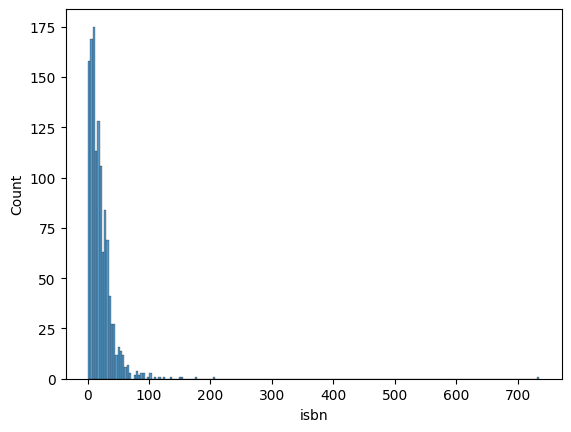

In [ ]:
sns.histplot(count_interactions)